# Data Analysis

This notebook runs the analysis used to make the source data underlying the figures in the manuscript "Femtosecond X-Ray Induced Changes of the Electronic and Magnetic Response of Solids from Electron Redistribution" by D. J. Higley and others.

In [1]:
%matplotlib inline
%pdb
# Import standard python modules
import sys
sys.path.append('../')
import xlsxwriter

Automatic pdb calling has been turned ON


/Users/dhigley/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


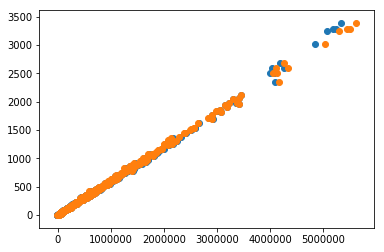

In [2]:
# Calibrate signals
import calibrate_signals
calibrate_signals.do_dark_calibration()
calibrate_signals.do_andor_saturation_calibration()
calibrate_signals.do_mcp_nonlinearity_calibration()


Fitting runs [124, 125] to ALS:
Photon energy scaling: 1.0000002091034599
Photon energy shift: 0.0001626193470166543
Spectrum scaling: 1.0026191546582999
Spectrum shift: -8.16962634146836e-07
Spectrum slope: 1.0827669696196989e-09
***Calculated Calibration Coefficients***
phot_scale 0.00645844211840402
phot_shift -1585.768302481368
norm_offset 6.357234677004966
norm_slope -0.021671687200112467

Fitting runs [126, 127] to ALS:
Photon energy scaling: 1.0
Photon energy shift: 0.0
Spectrum scaling: 1.0
Spectrum shift: 10.471085661455671
Spectrum slope: -0.013100923694720499
***Calculated Calibration Coefficients***
phot_scale 0.00645844211840402
phot_shift -1585.768302481368
norm_offset 6.635801703968088
norm_slope -0.03477261089483297

Fitting runs [109, 111, 117, 118] to ALS:
Photon energy scaling: 1.0
Photon energy shift: 0.0
Spectrum scaling: 1.0
Spectrum shift: 15.535424731579237
Spectrum slope: -0.017665766342895045
***Calculated Calibration Coefficients***
phot_scale 0.006458442118

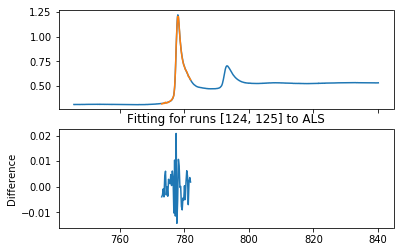

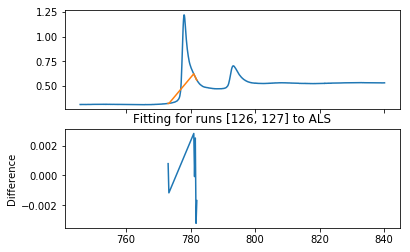

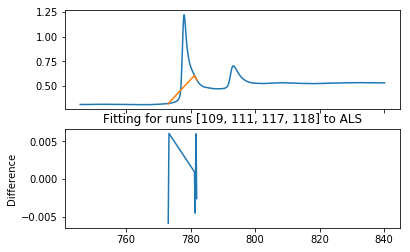

In [3]:
# Calibrate spectra
import calibrate_spectra
calibrate_spectra.do_cals()

In [4]:
# Calculate spectra and quantification of spectral changes
# Make source data file and print calculated percent of energy within
# 2 eV of the Fermi level as well as calculated cascade duration
import abs_get_processed_data
abs_get_processed_data.save_incident_specs()
abs_get_processed_data.save_constant_absorbed_specs()
abs_get_processed_data.save_damage_specs()
abs_get_processed_data.save_spec_quantification()

Caclulated fraction of energy within 2 eV of Fermi level of 
[0.83334506]
Calculated cascasde duration of
13.0 fs


In [5]:
# Make source data file
import make_source_data
source_data_workbook = xlsxwriter.Workbook('../../data/source_data.xlsx')
make_source_data.figure2.get_and_save_source_data(source_data_workbook)
make_source_data.figure3.get_and_save_source_data(source_data_workbook)
make_source_data.figure4.get_and_save_source_data(source_data_workbook)
make_source_data.figure_s1.get_and_save_source_data(source_data_workbook)
make_source_data.figure_s2.get_and_save_source_data(source_data_workbook)
make_source_data.figure_s3.get_and_save_source_data(source_data_workbook)
make_source_data.figure_s4.get_and_save_source_data(source_data_workbook)

source_data_workbook.close()

/Users/dhigley/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Times'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/dhigley/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


1814
1814
1814
1814
1814
1814
1814
1814
1814
1814
1814
1814
1814
1814
1814
[3.33534875e+03 1.00000000e+00]
Electronic temperature fit of 3335.3487505491953 K
7604


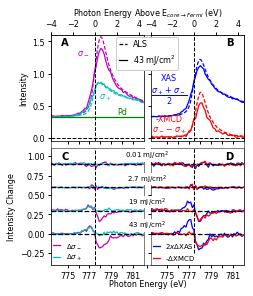

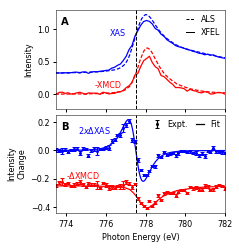

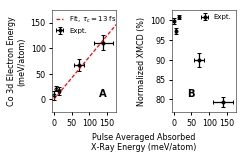

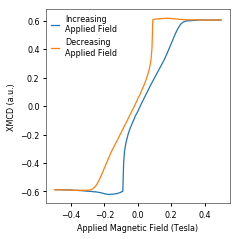

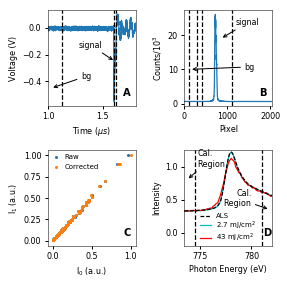

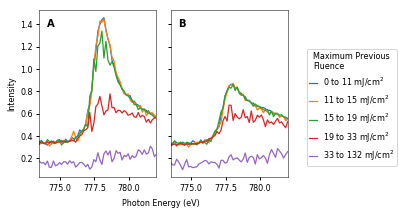

In [6]:
import visualize
visualize.overall_plot.make_plot()
visualize.constant_plot.constant_plot2()
visualize.quant_plot.make_figure()
visualize.loop_plotter.run()
visualize.raw_data_plot.make_plot()
visualize.damage_plot.make_plot()